In [18]:
import numpy as np
import math

In [2]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
#save and load function
import pickle
def save_obj(obj, name ):
    with open('./'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('./' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
#load the data
df_msft = load_obj("pkl_data/result_test_df_final")

In [ ]:
df_msft

In [ ]:
#data vitualization
import matplotlib.pyplot as plt

n = len(df_msft)
x = np.linspace(0, n, n)
y = df_msft['adj_close_price']
plt.plot(x, y)
plt.show()


In [ ]:
#normalize the price, transform to log returns and volatility
df_msft['daily_return'] = np.nan
df_msft['weekly_return'] = np.nan
df_msft['monthly_return'] = np.nan
count = 0

for index, row in df_msft.iterrows():
    #print(index)
    if count > 0:
        df_msft.loc[index,'daily_return']  = np.log(df_msft.loc[index,'adj_close_price']/df_msft.loc[index-1,'adj_close_price'])    
    if count > 5:
        df_msft.loc[index,'weekly_return']  = np.log(df_msft.loc[index,'adj_close_price']/df_msft.loc[index-6,'adj_close_price']) 
    if count > 28:
        df_msft.loc[index,'monthly_return']  = np.log(df_msft.loc[index,'adj_close_price']/df_msft.loc[index-29,'adj_close_price']) 
    count = count + 1


In [ ]:
df_msft

In [ ]:
#add volatility
#compute daily
df_msft['daily_vol_10d'] = df_msft['daily_return'].rolling(10).std()
#compute weekly
df_msft['weekly_vol_30d'] = df_msft['weekly_return'].rolling(30).std()
#compute monthly
df_msft['monthly_vol_90d'] = df_msft['monthly_return'].rolling(90).std()

In [ ]:
df_msft

In [ ]:
#reindex
df_msft = df_msft.reset_index()

In [ ]:
#before droping na, save the data set
save_obj(df_msft,"pkl_data/df_msft_w_na")

In [33]:
df_msft_w_na = load_obj("pkl_data/df_msft_w_na")

In [ ]:
#dropna
df_msft_final = df_msft.dropna()

In [ ]:
#save
save_obj(df_msft_final,"data/df_msft_final2")

In [9]:
df_msft_final = load_obj("data/df_msft_final2")

In [6]:
df_msft_final 

,level_0,index,date,adj_close_price,adj_volume,pricetobook,netdebttoebitda,ltdebttoebitda,adjdilutedeps,dividend,daily_return,weekly_return,monthly_return,daily_vol_10d,weekly_vol_30d,monthly_vol_90d
118,181,1516,2013-09-16,28.447629,55017879.0,3.0522,-2.3458,0.4090,2.58,0.23,-0.006957,0.051581,0.041164,0.020204,0.047429,0.089872
119,182,1515,2013-09-17,28.559508,84716461.0,3.0642,-2.3458,0.4090,2.58,0.23,0.003925,0.039488,0.048882,0.012683,0.047802,0.089141
120,183,1514,2013-09-18,28.897747,64103344.0,3.1005,-2.3458,0.4090,2.58,0.23,0.011774,0.028308,0.045477,0.009341,0.047932,0.088328
121,184,1513,2013-09-19,29.175276,42026553.0,3.1303,-2.3458,0.4090,2.58,0.23,0.009558,0.027118,0.029569,0.009183,0.048048,0.086938
122,185,1512,2013-09-20,28.438956,102904859.0,3.0513,-2.3458,0.4090,2.58,0.23,-0.025562,0.003085,0.009801,0.013714,0.047859,0.085327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,1693,4,2019-09-17,136.924085,17976285.0,10.3740,-1.1611,1.2039,5.06,0.46,0.007745,-0.000946,0.023172,0.010198,0.019840,0.039727
1631,1694,3,2019-09-18,138.050253,24473386.0,10.4593,-1.1611,1.2039,5.06,0.46,0.008191,0.017772,0.026992,0.009853,0.018114,0.039507
1632,1695,2,2019-09-19,140.591606,36095413.0,10.6519,-1.1611,1.2039,5.06,0.46,0.018242,0.035719,0.018898,0.010008,0.017611,0.039541
1633,1696,1,2019-09-20,138.967133,40040766.0,10.5288,-1.1611,1.2039,5.06,0.46,-0.011622,0.013865,0.015809,0.010514,0.017486,0.039571


In [ ]:
#draw daily vol
n = len(df_msft)
x = np.linspace(0, n, n)
y = df_msft['daily_vol_10d']
plt.plot(x, y)
plt.show()

In [ ]:
#draw weekly vol
n = len(df_msft)
x = np.linspace(0, n, n)
y = df_msft['weekly_vol_30d']
plt.plot(x, y)
plt.show()

In [ ]:
#draw monthly vol
n = len(df_msft)
x = np.linspace(0, n, n)
y = df_msft['monthly_vol_90d']
plt.plot(x, y)
plt.show()

In [8]:
import run
import importlib as ib

In [62]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 123

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

# 5. Configure a new global `tensorflow` session
#from keras import backend as K
#session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
#sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
#K.set_session(sess)
#sess = K.get_session()

In [69]:
ib.reload(run)

<module 'run' from 'C:\\Users\\Zijun\\Documents\\Projects\\Volatility Prediction\\run.py'>

In [70]:
#epoch = 20, daily vol 10d by itself

[Model] Model Compiled
Time taken: 0:00:01.456686
[Model] Training Started
[Model] 20 epochs, 32 batch size, 40 batches per epoch
Epoch 1/20
40/40 [==============================] - 2s 39ms/step - loss: 0.2361
Epoch 2/20
40/40 [==============================] - 1s 19ms/step - loss: 0.1639
Epoch 3/20
40/40 [==============================] - 1s 20ms/step - loss: 0.1098
Epoch 4/20
40/40 [==============================] - 1s 21ms/step - loss: 0.0839
Epoch 5/20
40/40 [==============================] - 1s 19ms/step - loss: 0.0714
Epoch 6/20
40/40 [==============================] - 1s 19ms/step - loss: 0.0601
Epoch 7/20
40/40 [==============================] - 1s 19ms/step - loss: 0.0580
Epoch 8/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0531
Epoch 9/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0459
Epoch 10/20
40/40 [==============================] - 1s 22ms/step - loss: 0.0428
Epoch 11/20
40/40 [==============================] - 1s 21ms/step - l

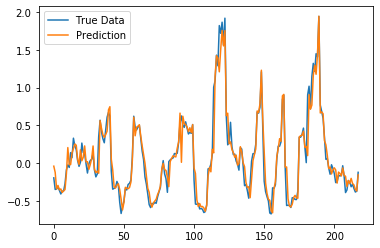

the mae of test sample is:  0.08944599772809317


In [73]:
run.main()

In [ ]:
#daily_vol_10d,vol and volume

In [75]:
ib.reload(run)

<module 'run' from 'C:\\Users\\Zijun\\Documents\\Projects\\Volatility Prediction\\run.py'>

[Model] Model Compiled
Time taken: 0:00:00.795256
[Model] Training Started
[Model] 20 epochs, 32 batch size, 40 batches per epoch
Epoch 1/20
40/40 [==============================] - 2s 38ms/step - loss: 0.2226
Epoch 2/20
40/40 [==============================] - 1s 19ms/step - loss: 0.1454
Epoch 3/20
40/40 [==============================] - 1s 19ms/step - loss: 0.1041
Epoch 4/20
40/40 [==============================] - 1s 19ms/step - loss: 0.0785
Epoch 5/20
40/40 [==============================] - 1s 19ms/step - loss: 0.0721
Epoch 6/20
40/40 [==============================] - 1s 19ms/step - loss: 0.0643
Epoch 7/20
40/40 [==============================] - 1s 21ms/step - loss: 0.0599
Epoch 8/20
40/40 [==============================] - 1s 22ms/step - loss: 0.0533
Epoch 9/20
40/40 [==============================] - 1s 22ms/step - loss: 0.0483
Epoch 10/20
40/40 [==============================] - 1s 21ms/step - loss: 0.0460
Epoch 11/20
40/40 [==============================] - 1s 21ms/step - l

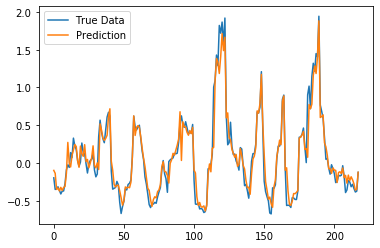

the mae of test sample is:  0.09390919339056165


In [76]:
run.main()

In [77]:
#daily vol + volume + pricetobook
ib.reload(run)

<module 'run' from 'C:\\Users\\Zijun\\Documents\\Projects\\Volatility Prediction\\run.py'>

[Model] Model Compiled
Time taken: 0:00:00.818982
[Model] Training Started
[Model] 20 epochs, 32 batch size, 40 batches per epoch
Epoch 1/20
40/40 [==============================] - 2s 40ms/step - loss: 0.2229
Epoch 2/20
40/40 [==============================] - 1s 20ms/step - loss: 0.1459
Epoch 3/20
40/40 [==============================] - 1s 20ms/step - loss: 0.1038
Epoch 4/20
40/40 [==============================] - 1s 21ms/step - loss: 0.0786
Epoch 5/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0720
Epoch 6/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0640
Epoch 7/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0598
Epoch 8/20
40/40 [==============================] - 1s 21ms/step - loss: 0.0531
Epoch 9/20
40/40 [==============================] - 1s 22ms/step - loss: 0.0482
Epoch 10/20
40/40 [==============================] - 1s 21ms/step - loss: 0.0457
Epoch 11/20
40/40 [==============================] - 1s 20ms/step - l

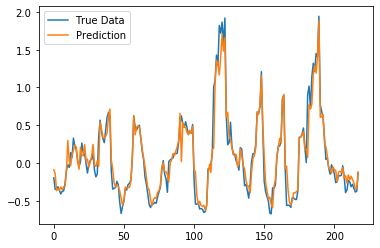

the mae of test sample is:  0.09484343725291611


In [78]:
run.main()

In [81]:
#use all the features
ib.reload(run)

<module 'run' from 'C:\\Users\\Zijun\\Documents\\Projects\\Volatility Prediction\\run.py'>

[Model] Model Compiled
Time taken: 0:00:00.783311
[Model] Training Started
[Model] 20 epochs, 32 batch size, 40 batches per epoch
Epoch 1/20
40/40 [==============================] - 2s 40ms/step - loss: 0.2260
Epoch 2/20
40/40 [==============================] - 1s 21ms/step - loss: 0.1478
Epoch 3/20
40/40 [==============================] - 1s 20ms/step - loss: 0.1020
Epoch 4/20
40/40 [==============================] - 1s 21ms/step - loss: 0.0794
Epoch 5/20
40/40 [==============================] - 1s 25ms/step - loss: 0.0726
Epoch 6/20
40/40 [==============================] - 1s 24ms/step - loss: 0.0643
Epoch 7/20
40/40 [==============================] - 1s 22ms/step - loss: 0.0598
Epoch 8/20
40/40 [==============================] - 1s 22ms/step - loss: 0.0529
Epoch 9/20
40/40 [==============================] - 1s 21ms/step - loss: 0.0485
Epoch 10/20
40/40 [==============================] - 1s 21ms/step - loss: 0.0460
Epoch 11/20
40/40 [==============================] - 1s 20ms/step - l

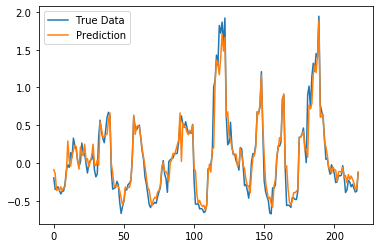

the mae of test sample is:  0.09496995558011048


In [82]:
run.main()

[Model] Model Compiled
Time taken: 0:00:02.293566
[Model] Training Started
[Model] 20 epochs, 32 batch size, 40 batches per epoch
Epoch 1/20
40/40 [==============================] - 3s 75ms/step - loss: 0.2377
Epoch 2/20
40/40 [==============================] - 2s 60ms/step - loss: 0.1667
Epoch 3/20
40/40 [==============================] - 2s 59ms/step - loss: 0.1102
Epoch 4/20
40/40 [==============================] - 2s 51ms/step - loss: 0.0869
Epoch 5/20
40/40 [==============================] - 2s 54ms/step - loss: 0.0737
Epoch 6/20
40/40 [==============================] - 2s 56ms/step - loss: 0.0619: 
Epoch 7/20
40/40 [==============================] - 2s 53ms/step - loss: 0.0574
Epoch 8/20
40/40 [==============================] - 2s 52ms/step - loss: 0.0520
Epoch 9/20
40/40 [==============================] - 2s 53ms/step - loss: 0.0457
Epoch 10/20
40/40 [==============================] - 2s 61ms/step - loss: 0.0427
Epoch 11/20
40/40 [==============================] - 2s 53ms/step -

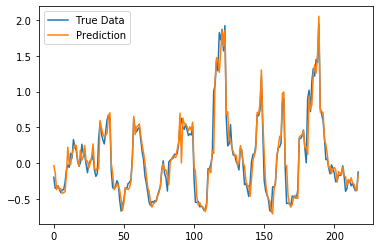

the mae of test sample is:  0.09449591557586588


In [87]:
#without volume
ib.reload(run)
run.main()

[Model] Model Compiled
Time taken: 0:00:00.780700
[Model] Training Started
[Model] 20 epochs, 32 batch size, 40 batches per epoch
Epoch 1/20
40/40 [==============================] - 3s 78ms/step - loss: 0.1119
Epoch 2/20
40/40 [==============================] - 2s 57ms/step - loss: 0.0687
Epoch 3/20
40/40 [==============================] - 2s 57ms/step - loss: 0.0426
Epoch 4/20
40/40 [==============================] - 2s 58ms/step - loss: 0.0393
Epoch 5/20
40/40 [==============================] - 3s 66ms/step - loss: 0.0294
Epoch 6/20
40/40 [==============================] - 3s 64ms/step - loss: 0.0270
Epoch 7/20
40/40 [==============================] - 3s 63ms/step - loss: 0.0230
Epoch 8/20
40/40 [==============================] - 2s 60ms/step - loss: 0.0212
Epoch 9/20
40/40 [==============================] - 3s 71ms/step - loss: 0.0180
Epoch 10/20
40/40 [==============================] - 3s 73ms/step - loss: 0.0203
Epoch 11/20
40/40 [==============================] - 3s 76ms/step - l

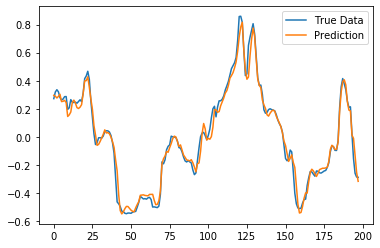

the mae of test sample is:  0.03500349104127174


In [83]:
#weekly vol
ib.reload(run)
run.main()

[Model] Model Compiled
Time taken: 0:00:01.070889
[Model] Training Started
[Model] 20 epochs, 32 batch size, 40 batches per epoch
Epoch 1/20
40/40 [==============================] - 4s 101ms/step - loss: 0.1197
Epoch 2/20
40/40 [==============================] - 3s 73ms/step - loss: 0.0607
Epoch 3/20
40/40 [==============================] - 3s 76ms/step - loss: 0.0407
Epoch 4/20
40/40 [==============================] - 3s 76ms/step - loss: 0.0343
Epoch 5/20
40/40 [==============================] - 3s 74ms/step - loss: 0.0248
Epoch 6/20
40/40 [==============================] - 3s 79ms/step - loss: 0.0247
Epoch 7/20
40/40 [==============================] - 3s 80ms/step - loss: 0.0211
Epoch 8/20
40/40 [==============================] - 3s 81ms/step - loss: 0.0283
Epoch 9/20
40/40 [==============================] - 4s 88ms/step - loss: 0.0167
Epoch 10/20
40/40 [==============================] - 3s 84ms/step - loss: 0.0192
Epoch 11/20
40/40 [==============================] - 3s 78ms/step - 

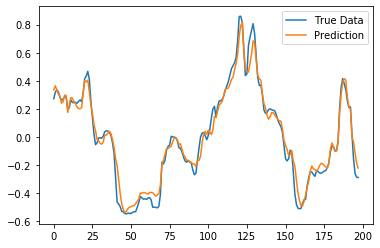

the mae of test sample is:  0.04462828007865752


In [84]:
#weekly vol + volume
ib.reload(run)
run.main()

[Model] Model Compiled
Time taken: 0:00:00.523562
[Model] Training Started
[Model] 20 epochs, 32 batch size, 40 batches per epoch
Epoch 1/20
40/40 [==============================] - 3s 77ms/step - loss: 0.1202
Epoch 2/20
40/40 [==============================] - 2s 56ms/step - loss: 0.0580
Epoch 3/20
40/40 [==============================] - 2s 54ms/step - loss: 0.0440
Epoch 4/20
40/40 [==============================] - 2s 55ms/step - loss: 0.0327: 0s - loss:
Epoch 5/20
40/40 [==============================] - 2s 57ms/step - loss: 0.0304
Epoch 6/20
40/40 [==============================] - 2s 59ms/step - loss: 0.0230
Epoch 7/20
40/40 [==============================] - 2s 55ms/step - loss: 0.0254
Epoch 8/20
40/40 [==============================] - 2s 55ms/step - loss: 0.0204
Epoch 9/20
40/40 [==============================] - 2s 55ms/step - loss: 0.0185
Epoch 10/20
40/40 [==============================] - 2s 55ms/step - loss: 0.0199
Epoch 11/20
40/40 [==============================] - 2s 5

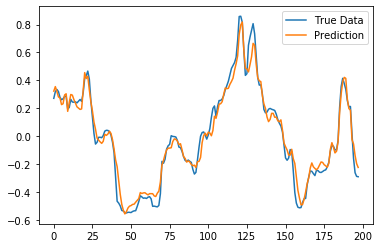

the mae of test sample is:  0.04592185660206939


In [9]:
#weekly vol + volume + price to book
ib.reload(run)
run.main()

[Model] Model Compiled
Time taken: 0:00:00.364026
[Model] Training Started
[Model] 20 epochs, 32 batch size, 40 batches per epoch
Epoch 1/20
40/40 [==============================] - 3s 79ms/step - loss: 0.1260
Epoch 2/20
40/40 [==============================] - 2s 62ms/step - loss: 0.0697
Epoch 3/20
40/40 [==============================] - 2s 59ms/step - loss: 0.0387
Epoch 4/20
40/40 [==============================] - 2s 59ms/step - loss: 0.0336
Epoch 5/20
40/40 [==============================] - 2s 60ms/step - loss: 0.0318
Epoch 6/20
40/40 [==============================] - 2s 60ms/step - loss: 0.0256
Epoch 7/20
40/40 [==============================] - 2s 59ms/step - loss: 0.0284
Epoch 8/20
40/40 [==============================] - 2s 62ms/step - loss: 0.0210
Epoch 9/20
40/40 [==============================] - 2s 61ms/step - loss: 0.0191
Epoch 10/20
40/40 [==============================] - 2s 60ms/step - loss: 0.0212
Epoch 11/20
40/40 [==============================] - 2s 62ms/step - l

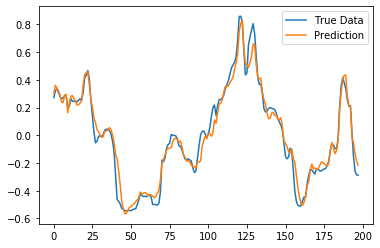

the mae of test sample is:  0.04624166373302408


In [10]:
#all features
ib.reload(run)
run.main()

[Model] Model Compiled
Time taken: 0:00:00.460300
[Model] Training Started
[Model] 20 epochs, 32 batch size, 38 batches per epoch
Epoch 1/20
38/38 [==============================] - 7s 195ms/step - loss: 0.0492
Epoch 2/20
38/38 [==============================] - 7s 177ms/step - loss: 0.0158
Epoch 3/20
38/38 [==============================] - 7s 176ms/step - loss: 0.0143
Epoch 4/20
38/38 [==============================] - 7s 175ms/step - loss: 0.0108
Epoch 5/20
38/38 [==============================] - 7s 185ms/step - loss: 0.0125
Epoch 6/20
38/38 [==============================] - 7s 192ms/step - loss: 0.0091
Epoch 7/20
38/38 [==============================] - 8s 202ms/step - loss: 0.0137
Epoch 8/20
38/38 [==============================] - 8s 198ms/step - loss: 0.0074
Epoch 9/20
38/38 [==============================] - 8s 211ms/step - loss: 0.0101
Epoch 10/20
38/38 [==============================] - 8s 211ms/step - loss: 0.0086
Epoch 11/20
38/38 [==============================] - 8s 221

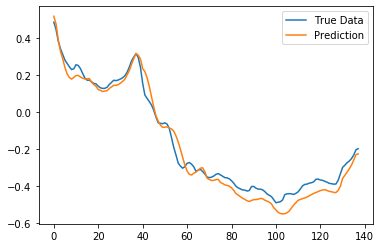

the mae of test sample is:  0.041658293326289134


In [11]:
#monthly vol
ib.reload(run)
run.main()

[Model] Model Compiled
Time taken: 0:00:00.492190
[Model] Training Started
[Model] 20 epochs, 32 batch size, 38 batches per epoch
Epoch 1/20
38/38 [==============================] - 7s 176ms/step - loss: 0.0592
Epoch 2/20
38/38 [==============================] - 6s 163ms/step - loss: 0.0198
Epoch 3/20
38/38 [==============================] - 6s 159ms/step - loss: 0.0291
Epoch 4/20
38/38 [==============================] - 6s 159ms/step - loss: 0.0118
Epoch 5/20
38/38 [==============================] - 6s 164ms/step - loss: 0.0110
Epoch 6/20
38/38 [==============================] - 6s 159ms/step - loss: 0.0095
Epoch 7/20
38/38 [==============================] - 6s 171ms/step - loss: 0.0074
Epoch 8/20
38/38 [==============================] - 7s 177ms/step - loss: 0.0120
Epoch 9/20
38/38 [==============================] - 7s 179ms/step - loss: 0.0093
Epoch 10/20
38/38 [==============================] - 7s 183ms/step - loss: 0.0129
Epoch 11/20
38/38 [==============================] - 7s 177

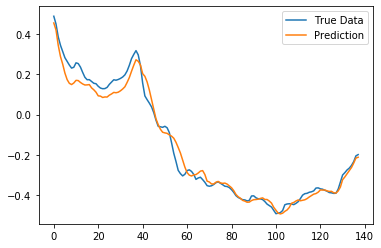

the mae of test sample is:  0.030537950310216534


In [12]:
#monthly vol + adj_volume
ib.reload(run)
run.main()

[Model] Model Compiled
Time taken: 0:00:00.426832
[Model] Training Started
[Model] 20 epochs, 32 batch size, 38 batches per epoch
Epoch 1/20
38/38 [==============================] - 8s 217ms/step - loss: 0.0612
Epoch 2/20
38/38 [==============================] - 10s 252ms/step - loss: 0.0215
Epoch 3/20
38/38 [==============================] - 9s 245ms/step - loss: 0.0369
Epoch 4/20
38/38 [==============================] - 9s 234ms/step - loss: 0.0105
Epoch 5/20
38/38 [==============================] - 9s 234ms/step - loss: 0.0099
Epoch 6/20
38/38 [==============================] - 9s 244ms/step - loss: 0.0081
Epoch 7/20
38/38 [==============================] - 9s 249ms/step - loss: 0.0073
Epoch 8/20
38/38 [==============================] - 11s 288ms/step - loss: 0.0068
Epoch 9/20
38/38 [==============================] - 11s 293ms/step - loss: 0.0131
Epoch 10/20
38/38 [==============================] - 11s 289ms/step - loss: 0.0181
Epoch 11/20
38/38 [==============================] - 11

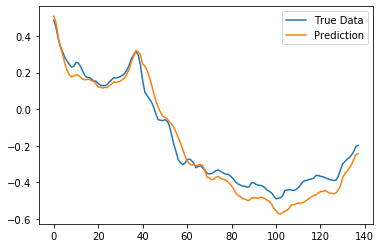

the mae of test sample is:  0.05404464528478394


In [13]:
#vol+volume+pricetobook
ib.reload(run)
run.main()

[Model] Model Compiled
Time taken: 0:00:00.439299
[Model] Training Started
[Model] 20 epochs, 32 batch size, 38 batches per epoch
Epoch 1/20
38/38 [==============================] - 9s 236ms/step - loss: 0.0851
Epoch 2/20
38/38 [==============================] - 10s 254ms/step - loss: 0.0313
Epoch 3/20
38/38 [==============================] - 10s 257ms/step - loss: 0.0199
Epoch 4/20
38/38 [==============================] - 10s 258ms/step - loss: 0.0268
Epoch 5/20
38/38 [==============================] - 10s 271ms/step - loss: 0.0109
Epoch 6/20
38/38 [==============================] - 10s 271ms/step - loss: 0.0185
Epoch 7/20
38/38 [==============================] - 11s 283ms/step - loss: 0.0133
Epoch 8/20
38/38 [==============================] - 12s 320ms/step - loss: 0.0122
Epoch 9/20
38/38 [==============================] - 12s 319ms/step - loss: 0.0096
Epoch 10/20
38/38 [==============================] - 12s 318ms/step - loss: 0.0170
Epoch 11/20
38/38 [==============================]

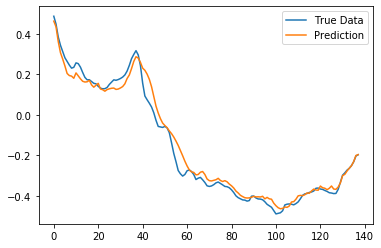

the mae of test sample is:  0.028939537869629394


In [14]:
#all features
ib.reload(run)
run.main()

In [5]:
#baseline garch
import warnings
warnings.simplefilter('ignore')d

%matplotlib inline
import seaborn
seaborn.set_style('darkgrid')

from arch import arch_model

seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90
seaborn.mpl.rcParams['font.family'] = 'sans-serif'
seaborn.mpl.rcParams['font.size'] = 14


In [13]:
import datetime as dt

In [37]:
df_msft_w_na["daily_vol_10d"][9]

nan

In [34]:
df_msft_w_na

,level_0,index,date,adj_close_price,adj_volume,pricetobook,netdebttoebitda,ltdebttoebitda,adjdilutedeps,dividend,daily_return,weekly_return,monthly_return,daily_vol_10d,weekly_vol_30d,monthly_vol_90d
0,63,1634,2013-04-01,24.467667,29203122.0,2.6893,-2.8782,0.4811,1.95,0.23,NaN,NaN,NaN,NaN,NaN,NaN
1,64,1633,2013-04-02,24.630158,28460384.0,2.7072,-2.8782,0.4811,1.95,0.23,0.006619,NaN,NaN,NaN,NaN,NaN
2,65,1632,2013-04-03,24.424907,35064468.0,2.6846,-2.8782,0.4811,1.95,0.23,-0.008368,NaN,NaN,NaN,NaN,NaN
3,66,1631,2013-04-04,24.454839,45267601.0,2.6879,-2.8782,0.4811,1.95,0.23,0.001225,NaN,NaN,NaN,NaN,NaN
4,67,1630,2013-04-05,24.544637,50928776.0,2.6978,-2.8782,0.4811,1.95,0.23,0.003665,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,1693,4,2019-09-17,136.924085,17976285.0,10.3740,-1.1611,1.2039,5.06,0.46,0.007745,-0.000946,0.023172,0.010198,0.019840,0.039727
1631,1694,3,2019-09-18,138.050253,24473386.0,10.4593,-1.1611,1.2039,5.06,0.46,0.008191,0.017772,0.026992,0.009853,0.018114,0.039507
1632,1695,2,2019-09-19,140.591606,36095413.0,10.6519,-1.1611,1.2039,5.06,0.46,0.018242,0.035719,0.018898,0.010008,0.017611,0.039541
1633,1696,1,2019-09-20,138.967133,40040766.0,10.5288,-1.1611,1.2039,5.06,0.46,-0.011622,0.013865,0.015809,0.010514,0.017486,0.039571


In [12]:
df_msft_final

,level_0,index,date,adj_close_price,adj_volume,pricetobook,netdebttoebitda,ltdebttoebitda,adjdilutedeps,dividend,daily_return,weekly_return,monthly_return,daily_vol_10d,weekly_vol_30d,monthly_vol_90d
118,181,1516,2013-09-16,28.447629,55017879.0,3.0522,-2.3458,0.4090,2.58,0.23,-0.006957,0.051581,0.041164,0.020204,0.047429,0.089872
119,182,1515,2013-09-17,28.559508,84716461.0,3.0642,-2.3458,0.4090,2.58,0.23,0.003925,0.039488,0.048882,0.012683,0.047802,0.089141
120,183,1514,2013-09-18,28.897747,64103344.0,3.1005,-2.3458,0.4090,2.58,0.23,0.011774,0.028308,0.045477,0.009341,0.047932,0.088328
121,184,1513,2013-09-19,29.175276,42026553.0,3.1303,-2.3458,0.4090,2.58,0.23,0.009558,0.027118,0.029569,0.009183,0.048048,0.086938
122,185,1512,2013-09-20,28.438956,102904859.0,3.0513,-2.3458,0.4090,2.58,0.23,-0.025562,0.003085,0.009801,0.013714,0.047859,0.085327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,1693,4,2019-09-17,136.924085,17976285.0,10.3740,-1.1611,1.2039,5.06,0.46,0.007745,-0.000946,0.023172,0.010198,0.019840,0.039727
1631,1694,3,2019-09-18,138.050253,24473386.0,10.4593,-1.1611,1.2039,5.06,0.46,0.008191,0.017772,0.026992,0.009853,0.018114,0.039507
1632,1695,2,2019-09-19,140.591606,36095413.0,10.6519,-1.1611,1.2039,5.06,0.46,0.018242,0.035719,0.018898,0.010008,0.017611,0.039541
1633,1696,1,2019-09-20,138.967133,40040766.0,10.5288,-1.1611,1.2039,5.06,0.46,-0.011622,0.013865,0.015809,0.010514,0.017486,0.039571


In [100]:
#take the prev day volatility
vol_10d = df_msft_final["daily_vol_10d"]
vol_10d

118     0.020204
119     0.012683
120     0.009341
121     0.009183
122     0.013714
          ...   
1630    0.010198
1631    0.009853
1632    0.010008
1633    0.010514
1634    0.009752
Name: daily_vol_10d, Length: 1517, dtype: float64

In [101]:
#split train and test by 85/15 as what's been done in the neural networks
index_mask = math.floor(0.85 * len(vol_10d))

y_real = vol_10d[index_mask:-1]
#take prev day
y_pred_naive = vol_10d[index_mask-1:-2]

In [102]:
len(y_real)

227

In [103]:
len(y_pred_naive)

227

In [104]:
#mean absolute error
from sklearn.metrics import mean_absolute_error
mae_naive = mean_absolute_error(y_real,y_pred_naive)

In [105]:
mae_naive

0.0012655148521214057

In [ ]:
###GARCH---------------

In [44]:
daily_return = df_msft_w_na["daily_return"].dropna()

In [45]:
len(daily_return)

1634

In [46]:
#split train and test by 85/15 in temporal sequence
index_mask = math.floor(0.85 * len(ret_10d))

ret_in_sample = daily_return[:index_mask]
ret_out_sample = daily_return[index_mask:]


In [47]:
len(ret_in_sample)+len(ret_out_sample)

1634

In [48]:
ret_in_sample.iloc[-1]

0.01172516675444798

In [49]:
ret_out_sample.iloc[0]

0.00995645894875025

In [96]:
#GARCH(p=9,q=9) on daily return (P is more important)
model_vol_10d = arch_model(ret_in_sample, vol='Garch', p=1, q=2, dist='Normal')
res = model_vol_10d.fit(update_freq=5)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3648.6356003615692
            Iterations: 3
            Function evaluations: 29
            Gradient evaluations: 2


In [97]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:           daily_return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                3648.64
Distribution:                  Normal   AIC:                          -7287.27
Method:            Maximum Likelihood   BIC:                          -7261.46
                                        No. Observations:                 1289
Date:                Thu, Dec 12 2019   Df Residuals:                     1284
Time:                        20:12:04   Df Model:                            5
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.2190e-03  4.045e-04      3.013  2.583e-03 [4.

In [99]:
res.params

mu          0.001219
omega       0.000064
alpha[1]    0.200000
beta[1]     0.250000
beta[2]     0.250000
Name: params, dtype: float64